In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.dates import YearLocator, MonthLocator

In [2]:
raw = pd.read_csv('./data/tr_eikon_eod_data.csv', 
                  index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [3]:
selected = ['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']

In [4]:
data = pd.DataFrame(raw[selected].dropna())
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [5]:
for stock in selected:
    data['Returns_' + stock] = np.log(data[stock] / data[stock].shift(1)).dropna()
    data['Returns_' + stock].fillna(0, inplace=True)
data

/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_99744/2098642776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Returns_' + stock].fillna(0, inplace=True)
/var/folders/2b/tgv3r4pj32b_81f22_mtv7bh0000gn/T/ipykernel_99744/2098642776.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns_AAPL.O,Returns_MSFT.O,Returns_INTC.O,Returns_AMZN.O,Returns_GS.N
Date,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525
2010-01-06,30.138541,30.770,20.80,132.25,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731
2010-01-07,30.082827,30.452,20.60,130.00,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093
...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338


In [6]:
for stock in selected:
    data['direction_' + stock] = np.sign(data['Returns_' + stock]).dropna().astype(int)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,Returns_AAPL.O,Returns_MSFT.O,Returns_INTC.O,Returns_AMZN.O,Returns_GS.N,direction_AAPL.O,direction_MSFT.O,direction_INTC.O,direction_AMZN.O,direction_GS.N
Date,,,,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
2010-01-05,30.625684,30.960,20.87,134.69,176.14,0.001727,0.000323,-0.000479,0.005883,0.017525,1,1,-1,1,1
2010-01-06,30.138541,30.770,20.80,132.25,174.26,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,-1,-1,-1,-1,-1
2010-01-07,30.082827,30.452,20.60,130.00,177.67,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,-1,-1,-1,-1,1
2010-01-08,30.282827,30.660,20.83,133.52,174.31,0.006626,0.006807,0.011103,0.026717,-0.019093,1,1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-1,-1,-1,-1,-1
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,0.012330,0.006988,-0.020722,0.016660,0.000181,1,1,-1,1,1
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-1,-1,-1,-1,-1


In [7]:
split = int(len(data)*0.8)
data_train = data.iloc[:split].copy()
data_test = data.iloc[split:].copy()

In [8]:
def train_hmm(data, n_iter=500):
    best_model = None
    best_score = float('-inf')
    
    for _ in range(n_iter):
        model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
        model.fit(data)
        score = model.score(data)
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model

In [17]:
def generate_trading_signals(hidden_states, model):
    signals = np.zeros(len(hidden_states))
    for i in range(1, len(hidden_states)):
        if model.means_[hidden_states[i]] == model.means_.max():
            signals[i] = 1
        else:
            signals[i] = -1
    return signals

In [14]:
data_train.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'Returns_AAPL.O',
       'Returns_MSFT.O', 'Returns_INTC.O', 'Returns_AMZN.O', 'Returns_GS.N',
       'direction_AAPL.O', 'direction_MSFT.O', 'direction_INTC.O',
       'direction_AMZN.O', 'direction_GS.N', 'Signal_AAPL.O',
       'Returns_HMM_AAPL.O'],
      dtype='object')

--Training--


Model is not converging.  Current: 4690.371450218004 is not greater than 4690.415454445155. Delta is -0.04400422715116292
Model is not converging.  Current: 4690.920270100629 is not greater than 4690.989328235659. Delta is -0.06905813502999081
Model is not converging.  Current: 4689.131422430036 is not greater than 4689.1437997325265. Delta is -0.012377302490676811
Model is not converging.  Current: 4690.934130136205 is not greater than 4691.009853396825. Delta is -0.07572326062017964
Model is not converging.  Current: 4688.739198176978 is not greater than 4688.7423854368835. Delta is -0.0031872599056441686
Model is not converging.  Current: 4690.823978252882 is not greater than 4690.871006677625. Delta is -0.04702842474307545
Model is not converging.  Current: 4690.428008174339 is not greater than 4690.527036791458. Delta is -0.09902861711907462
Model is not converging.  Current: 4689.400057186537 is not greater than 4689.420856726752. Delta is -0.0207995402151937
Model is not converg

Returns_AAPL.O         3.844918
Returns_HMM_AAPL.O    13.686281
dtype: float64
--Testing--
Returns_AAPL.O        1.574734
Returns_HMM_AAPL.O    1.375585
dtype: float64


Model is not converging.  Current: 4936.85709990542 is not greater than 4936.98382774868. Delta is -0.12672784325968678


--Training--


Model is not converging.  Current: 4935.966077384468 is not greater than 4935.978706121815. Delta is -0.012628737346858543
Model is not converging.  Current: 4935.831786102697 is not greater than 4935.843840350101. Delta is -0.01205424740419403
Model is not converging.  Current: 4935.930271898582 is not greater than 4935.951244720042. Delta is -0.020972821460418345
Model is not converging.  Current: 4936.24228088443 is not greater than 4936.267277097343. Delta is -0.024996212912810734
Model is not converging.  Current: 4937.001213066273 is not greater than 4937.006192721408. Delta is -0.0049796551356848795
Model is not converging.  Current: 4935.567622780463 is not greater than 4935.570529912817. Delta is -0.002907132353357156
Model is not converging.  Current: 4935.867021977354 is not greater than 4935.868007818567. Delta is -0.0009858412131507066
Model is not converging.  Current: 4935.85314617374 is not greater than 4935.868274802158. Delta is -0.015128628418096923
Model is not conv

Returns_MSFT.O        1.848788
Returns_HMM_MSFT.O    2.373158
dtype: float64
--Testing--
Returns_MSFT.O        1.723348
Returns_HMM_MSFT.O    1.647015
dtype: float64
--Training--


Model is not converging.  Current: 4857.142292793586 is not greater than 4857.148003023699. Delta is -0.005710230112526915
Model is not converging.  Current: 4856.286668581628 is not greater than 4856.335154007937. Delta is -0.0484854263086163
Model is not converging.  Current: 4856.661222219369 is not greater than 4856.66151949726. Delta is -0.0002972778911498608
Model is not converging.  Current: 4859.816076616258 is not greater than 4860.0849429945165. Delta is -0.26886637825828075
Model is not converging.  Current: 4856.582373368689 is not greater than 4856.641968506467. Delta is -0.059595137777250784
Model is not converging.  Current: 4857.639720455375 is not greater than 4857.693788914332. Delta is -0.05406845895686274
Model is not converging.  Current: 4858.385483219479 is not greater than 4858.552291592216. Delta is -0.16680837273634097
Model is not converging.  Current: 4855.9463876099535 is not greater than 4855.96085651712. Delta is -0.014468907166701683
Model is not converg

Returns_INTC.O        1.785920
Returns_HMM_INTC.O    4.793526
dtype: float64
--Testing--
Returns_INTC.O        1.333065
Returns_HMM_INTC.O    0.980319
dtype: float64
--Training--


Model is not converging.  Current: 4418.766727413568 is not greater than 4418.770146567015. Delta is -0.003419153446884593
Model is not converging.  Current: 4418.863168729648 is not greater than 4418.886152133147. Delta is -0.022983403498983535
Model is not converging.  Current: 4418.7030661725 is not greater than 4418.719909828147. Delta is -0.016843655646880507
Model is not converging.  Current: 4418.440356839895 is not greater than 4418.4440645581735. Delta is -0.003707718278747052
Model is not converging.  Current: 4418.90629707799 is not greater than 4418.917032285369. Delta is -0.01073520737918443
Model is not converging.  Current: 4418.658051327861 is not greater than 4418.701283268607. Delta is -0.04323194074549974
Model is not converging.  Current: 4418.87349498592 is not greater than 4418.903267841918. Delta is -0.029772855998089653
Model is not converging.  Current: 4418.458951158084 is not greater than 4418.46361016158. Delta is -0.004659003495362413
Model is not convergin

Returns_AMZN.O        6.071322
Returns_HMM_AMZN.O    8.355412
dtype: float64
--Testing--
Returns_AMZN.O        2.090903
Returns_HMM_AMZN.O    2.637601
dtype: float64
--Training--


Model is not converging.  Current: 4690.623992781775 is not greater than 4690.661546258746. Delta is -0.03755347697097022
Model is not converging.  Current: 4690.587194092009 is not greater than 4690.634694484158. Delta is -0.04750039214923163
Model is not converging.  Current: 4690.619996707709 is not greater than 4690.644558604025. Delta is -0.02456189631629968
Model is not converging.  Current: 4690.624980380334 is not greater than 4690.664526570967. Delta is -0.03954619063279097
Model is not converging.  Current: 4690.626785502476 is not greater than 4690.648078701113. Delta is -0.02129319863706769
Model is not converging.  Current: 4690.590230506512 is not greater than 4690.612575295552. Delta is -0.02234478904028947
Model is not converging.  Current: 4690.632944773252 is not greater than 4690.657029724128. Delta is -0.024084950875476352
Model is not converging.  Current: 4690.610438907908 is not greater than 4690.656526685424. Delta is -0.04608777751582238
Model is not converging

Returns_GS.N        0.976427
Returns_HMM_GS.N    4.767952
dtype: float64
--Testing--
Returns_GS.N        1.305148
Returns_HMM_GS.N    1.196733
dtype: float64


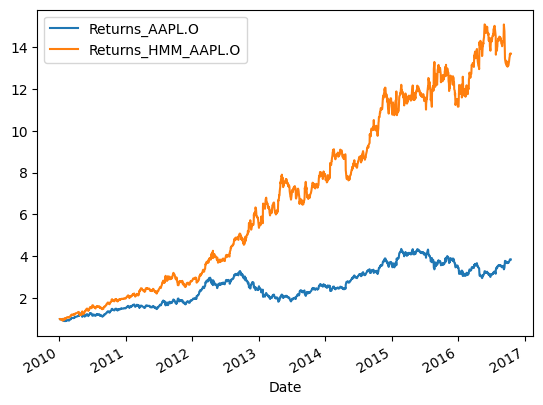

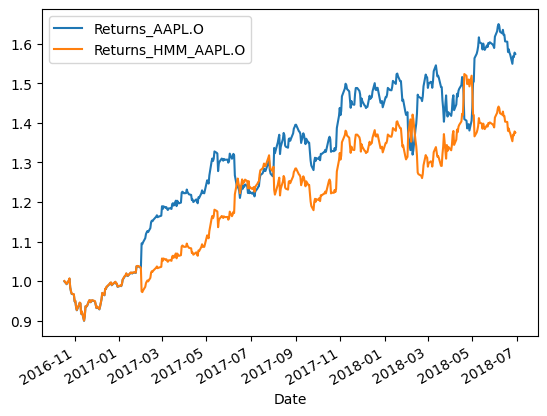

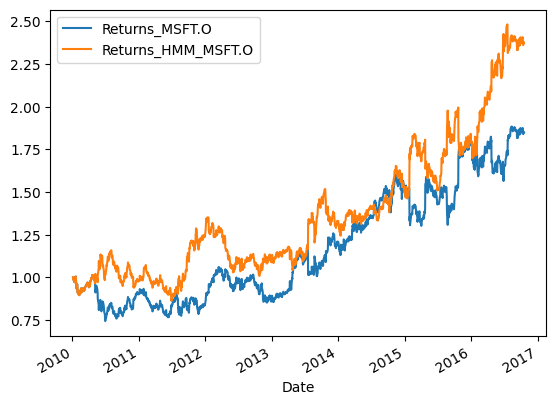

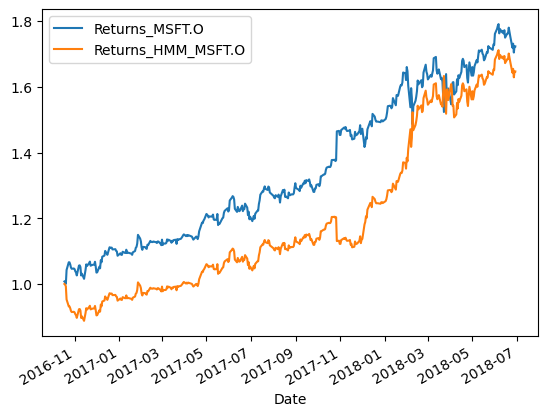

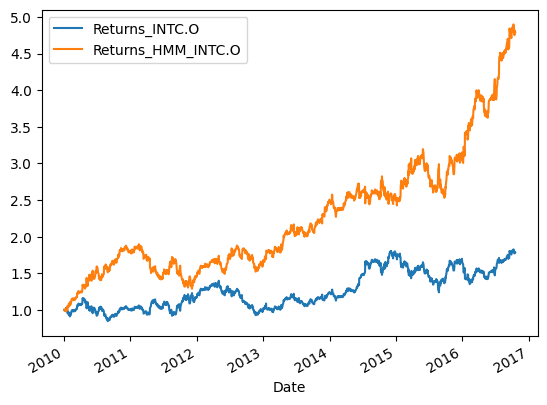

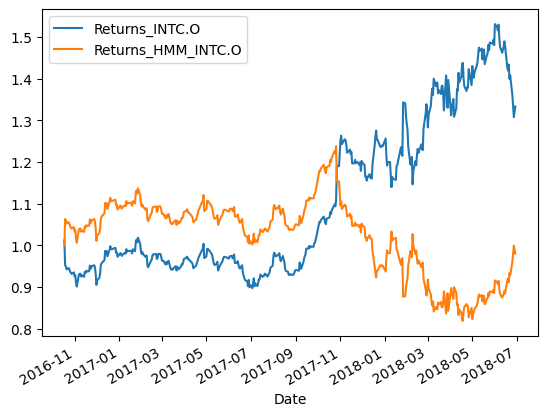

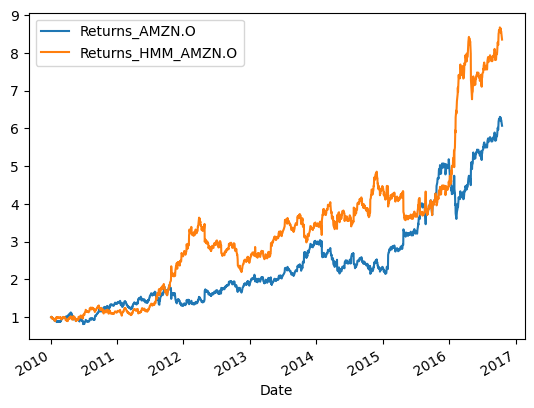

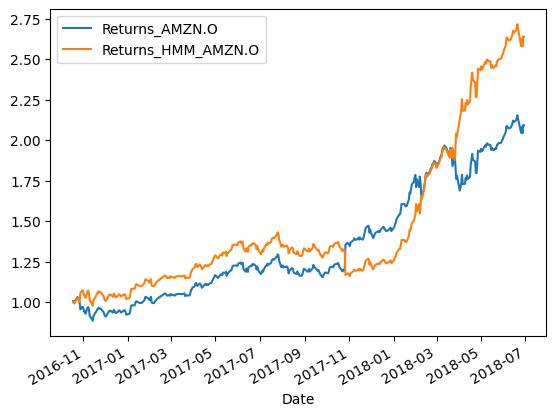

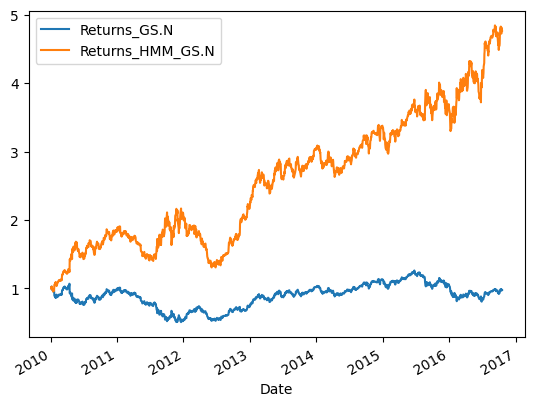

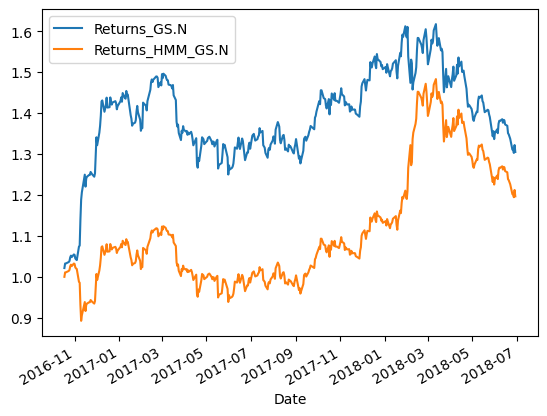

In [18]:
for stock in selected:
    print('--Training--')
    rets_train = data_train[['Returns_' + stock]]
    model = train_hmm(rets_train)
    hidden_states_train = model.predict(rets_train)
    trading_signals_train = generate_trading_signals(hidden_states_train, model)
    data_train['Signal_' + stock] = trading_signals_train
    data_train['Returns_HMM_' + stock] = data_train['Signal_' + stock] * data_train['Returns_' + stock]
    print(data_train[['Returns_' + stock, 'Returns_HMM_' + stock]].sum().apply(np.exp))
    data_train[['Returns_' + stock, 'Returns_HMM_' + stock]].cumsum().apply(np.exp).plot()

    print('--Testing--')
    rets_test = data_test[['Returns_' + stock]]
    hidden_states_test = model.predict(rets_test)
    trading_signals_test = generate_trading_signals(hidden_states_test, model)
    data_test['Signal_' + stock] = trading_signals_test
    data_test['Returns_HMM_' + stock] = data_test['Signal_' + stock] * data_test['Returns_' + stock]
    print(data_test[['Returns_' + stock, 'Returns_HMM_' + stock]].sum().apply(np.exp))
    data_test[['Returns_' + stock, 'Returns_HMM_' + stock]].cumsum().apply(np.exp).plot()

In [23]:
print('--Training--')
for stock in selected:
    print(data_train[['Returns_' + stock, 'Returns_HMM_' + stock]].sum().apply(np.exp))  

--Training--
Returns_AAPL.O         3.844918
Returns_HMM_AAPL.O    13.686281
dtype: float64
Returns_MSFT.O        1.848788
Returns_HMM_MSFT.O    2.373158
dtype: float64
Returns_INTC.O        1.785920
Returns_HMM_INTC.O    4.793526
dtype: float64
Returns_AMZN.O        6.071322
Returns_HMM_AMZN.O    8.355412
dtype: float64
Returns_GS.N        0.976427
Returns_HMM_GS.N    4.767952
dtype: float64


In [24]:
print('--Testing--')
for stock in selected:
    print(data_test[['Returns_' + stock, 'Returns_HMM_' + stock]].sum().apply(np.exp))

--Testing--
Returns_AAPL.O        1.574734
Returns_HMM_AAPL.O    1.375585
dtype: float64
Returns_MSFT.O        1.723348
Returns_HMM_MSFT.O    1.647015
dtype: float64
Returns_INTC.O        1.333065
Returns_HMM_INTC.O    0.980319
dtype: float64
Returns_AMZN.O        2.090903
Returns_HMM_AMZN.O    2.637601
dtype: float64
Returns_GS.N        1.305148
Returns_HMM_GS.N    1.196733
dtype: float64


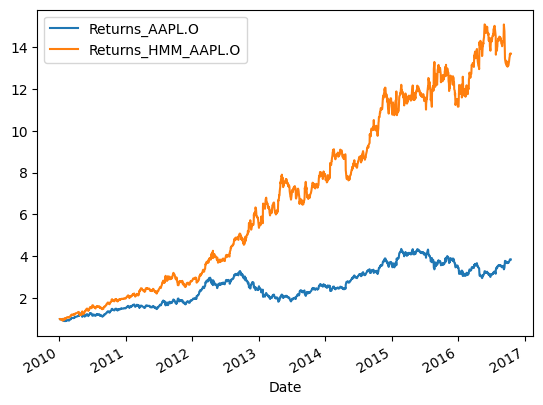

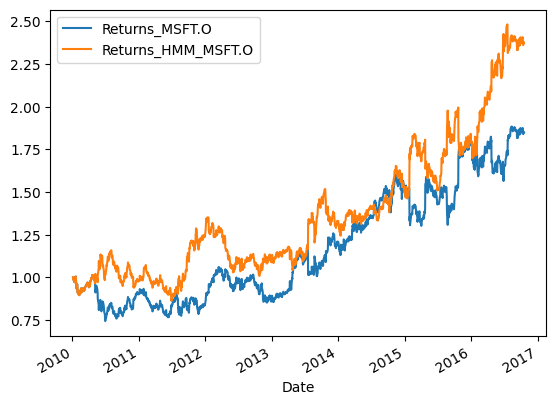

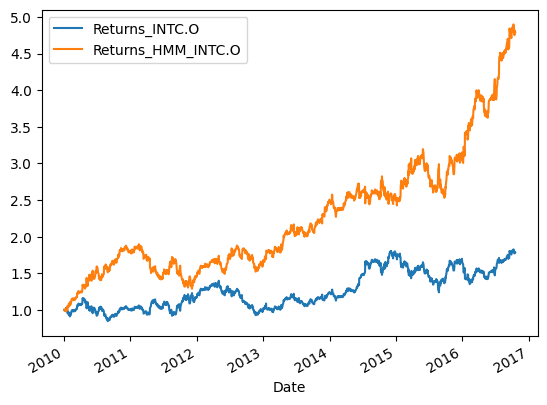

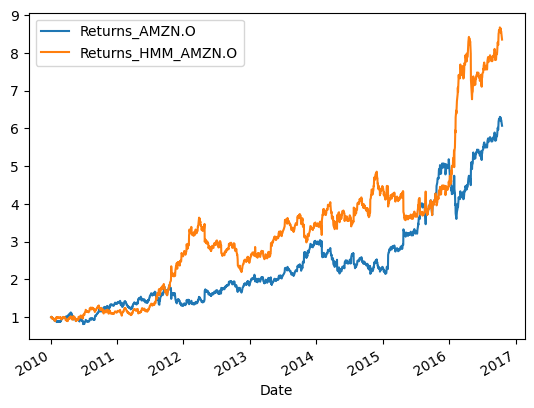

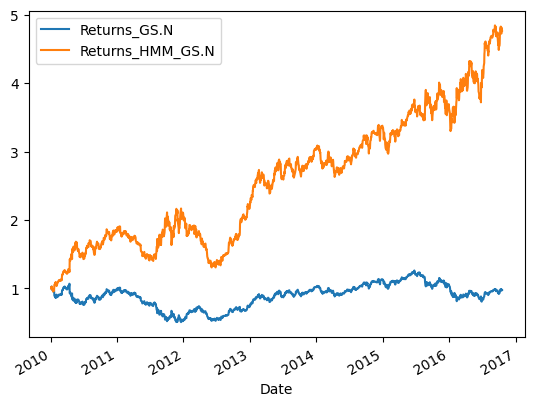

In [21]:
for stock in selected:
    data_train[['Returns_' + stock, 'Returns_HMM_' + stock]].cumsum().apply(np.exp).plot()

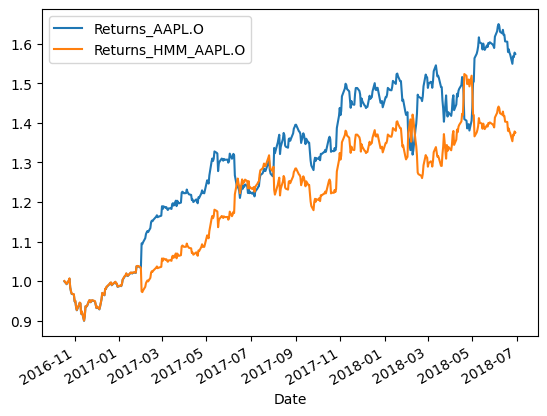

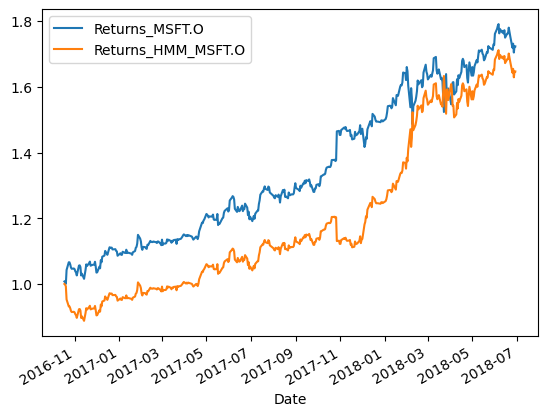

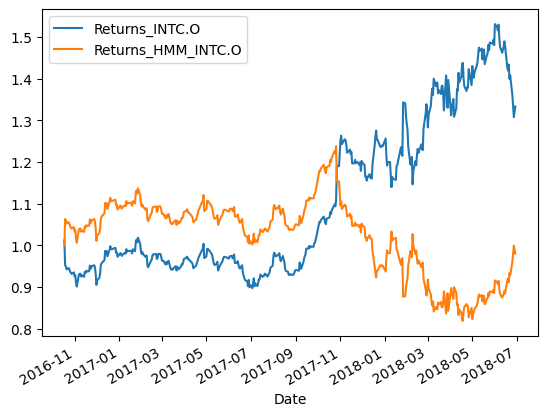

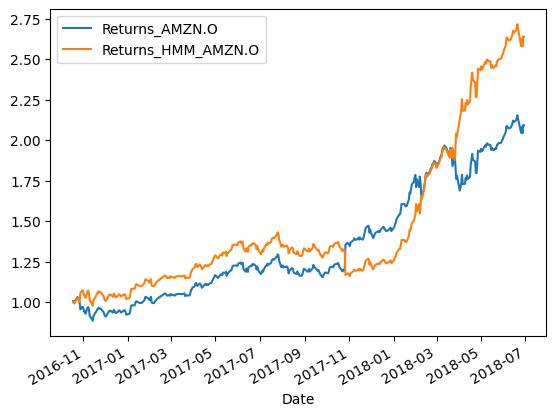

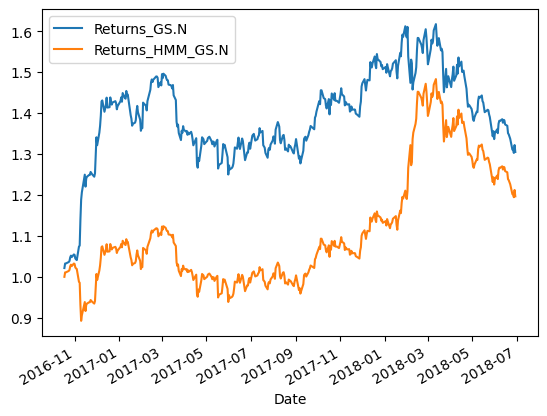

In [22]:
for stock in selected:
    data_test[['Returns_' + stock, 'Returns_HMM_' + stock]].cumsum().apply(np.exp).plot()